In [82]:
from TransportModel import TransportModel
from Agents import StepType
import pandas as pd
import statistics

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:

def get_waiting_df(step_type):
    seeds = [1,2,3,4,5]
   
    av_waiting = []



    waiting_df = pd.DataFrame()
    for num_cars in range(1,5):

        for seed in seeds:
            model = TransportModel(num_cars, 10, 10, False, seed, step_type)
            for i in range(400):
                model.step()
            
            agents = model.datacollector.get_agent_vars_dataframe()

            # extract waiting data and clean
            waiting = agents.dropna(subset="WaitingTime")
            waiting = waiting[waiting.WaitingTime != -1]
            waiting.reset_index(level=[0], inplace=True)
            waiting.drop(["Step", "Steps"], axis=1, inplace=True)
            


            av_waiting.append(waiting["WaitingTime"].mean())

        seed_av = statistics.mean(av_waiting)

        waiting_df = pd.concat([waiting_df, pd.DataFrame({'num_drivers': [num_cars], 'waiting_time': [seed_av]})], ignore_index=True)
    
    return waiting_df


In [115]:
strategies = [StepType.CLOSEST, StepType.WAITING, StepType.QUEUE]
# strategies = [StepType.CLOSEST]


for strategy in strategies:
    waiting_df = get_waiting_df(strategy)

Agent 1: Location(x=2, y=9) to Location(x=1, y=4)
Destination Reached
NUM PASSENGERS:  1
Destination Reached
Waiting for new client
Agent 4: Location(x=7, y=7) to Location(x=6, y=3)
Destination Reached
NUM PASSENGERS:  1
Agent 6: Location(x=1, y=7) to Location(x=0, y=6)
Destination Reached
Waiting for new client
Waited too long - passenger 6 has left
Agent 7: Location(x=6, y=9) to Location(x=0, y=7)
Destination Reached
NUM PASSENGERS:  1
Agent 9: Location(x=4, y=3) to Location(x=9, y=1)
Destination Reached
Waiting for new client
Waited too long - passenger 9 has left
Agent 10: Location(x=5, y=0) to Location(x=0, y=0)
Waited too long - passenger 10 has left
Agent 11: Location(x=8, y=0) to Location(x=6, y=3)
Waited too long - passenger 11 has left
Agent 12: Location(x=6, y=0) to Location(x=8, y=3)
Agent 13: Location(x=7, y=7) to Location(x=8, y=3)
Waited too long - passenger 12 has left
Destination Reached
NUM PASSENGERS:  1
Agent 15: Location(x=5, y=3) to Location(x=3, y=7)
Destination 

,num_drivers,waiting_time
0,1,6.995714
1,2,6.235819
2,3,6.013104
3,4,5.837952


<AxesSubplot: xlabel='num_drivers'>

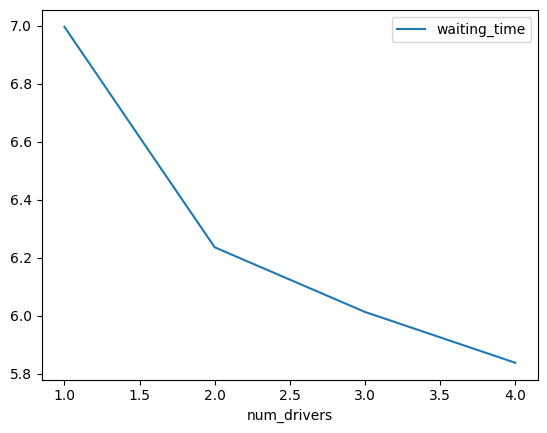

In [116]:
display(waiting_df)
waiting_df.plot(x='num_drivers', y='waiting_time')

In [8]:
# waiting = agents.dropna(subset="WaitingTime")
# waiting = waiting[waiting.WaitingTime != -1]


# waiting.reset_index(level=[0], inplace=True)
# waiting.drop(["Step", "Steps"], axis=1, inplace=True)

# waiting_av = waiting["WaitingTime"].mean()
# print(waiting_av)

# waiting

84.36363636363636


,WaitingTime
AgentID,
1,6.0
4,21.0
7,17.0
2,38.0
34,4.0
26,44.0
36,17.0
17,88.0
49,4.0
